In [11]:
import jax
import jax.numpy as jnp
import io
import base64
import time
from functools import partial
from typing import NamedTuple
import subprocess

import PIL
import numpy as np
import matplotlib.pylab as pl

def norm(v, axis=-1, keepdims=False, eps=0.0):
  return jnp.sqrt((v*v).sum(axis, keepdims=keepdims).clip(eps))

def normalize(v, axis=-1, eps=1e-20):
  return v/norm(v, axis, keepdims=True, eps=eps)


class Balls(NamedTuple):
  pos: jnp.ndarray
  color: jnp.ndarray




In [12]:
def show_slice(sdf, z=0.0, w=400, r=3.5):
  y, x = jnp.mgrid[-r:r:w*1j, -r:r:w*1j].reshape(2, -1)
  p = jnp.c_[x, y, x*0.0+z]
  d = jax.vmap(sdf)(p).reshape(w, w)
  pl.figure(figsize=(5, 5))
  kw = dict(extent=(-r, r, -r, r), vmin=-r, vmax=r)
  pl.contourf(d, 16, cmap='bwr', **kw );
  pl.contour(d, levels=[0.0], colors='black', **kw);
  pl.axis('equal')
  pl.xlabel('x')
  pl.ylabel('y')

(1000,)


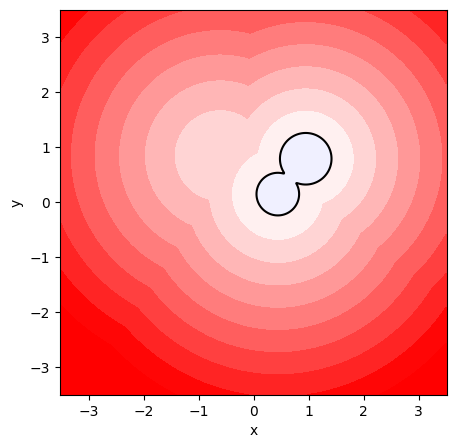

In [13]:
def create_balls(key, n=3, R=3.0):
  pos, color = jax.random.uniform(key, [2, n, 3])
  pos = (pos-0.5)*R
  return Balls(pos, color)

key = jax.random.PRNGKey(123)
balls = create_balls(key)

def balls_sdf(balls, p, ball_r=0.5):
  dists = norm(p-balls.pos)-ball_r
  return dists.min()

p = jax.random.normal(key, [1000, 3])
print( jax.vmap(partial(balls_sdf, balls))(p).shape )

show_slice(partial(balls_sdf, balls), z=0.0)

In [14]:
time to save it in a form readable by sitk

SyntaxError: invalid syntax (2248946117.py, line 1)